In [1]:
import wandb
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


data_dir = pathlib.Path("./results/uppercase")

train_data = pd.read_csv(data_dir / "train_accuracy.csv")
val_data = pd.read_csv(data_dir / "val_accuracy.csv")

# drop column calld Step
#train_data = train_data.drop(columns=["Step"])
#val_data = val_data.drop(columns=["Step"])

# remove "Name: "
train_data.columns = [ c.replace("Name: ", "") for c in train_data.columns ]
val_data.columns = [ c.replace("Name: ", "") for c in val_data.columns ]

# replace accuracy__MIN with "min" and accuracy__MAX with "max"
train_data.columns = [ c.replace("accuracy__MIN", "min") for c in train_data.columns ]
train_data.columns = [ c.replace("accuracy__MAX", "max") for c in train_data.columns ]
val_data.columns = [ c.replace("val_accuracy__MAX", "max") for c in val_data.columns ]
val_data.columns = [ c.replace("val_accuracy__MIN", "min") for c in val_data.columns ]
val_data.columns = [ c.replace("val_accuracy", "accuracy") for c in val_data.columns ]

train_data.head()

,Step,architecture-4 - accuracy,architecture-4 - min,architecture-4 - max,architecture-1 - accuracy,architecture-1 - min,architecture-1 - max,architecture-2 - accuracy,architecture-2 - min,architecture-2 - max,...,architecture-5 - max,architecture-baseline - accuracy,architecture-baseline - min,architecture-baseline - max,architecture-7 - accuracy,architecture-7 - min,architecture-7 - max,architecture-6 - accuracy,architecture-6 - min,architecture-6 - max
0,0,0.893917,0.890426,0.897155,0.907978,0.904198,0.911937,0.916748,0.913703,0.920696,...,0.899025,0.882841,0.882787,0.882896,0.792991,0.780010,0.810012,0.907115,0.902574,0.909676
1,1,0.952612,0.950211,0.954561,0.954791,0.952986,0.956399,0.959055,0.957882,0.960052,...,0.942399,0.941750,0.941389,0.942112,0.895568,0.890394,0.900936,0.945056,0.943636,0.946020
2,2,0.968660,0.967186,0.970349,0.966905,0.965130,0.968392,0.969587,0.968570,0.970494,...,0.951298,0.950543,0.950438,0.950648,0.910871,0.907647,0.914595,0.953372,0.951976,0.954292
3,3,0.977607,0.975890,0.978420,0.974115,0.972573,0.975303,0.975973,0.974898,0.976964,...,0.955825,0.955120,0.954875,0.955366,0.918452,0.916278,0.920673,0.958653,0.957122,0.959625
4,4,0.983105,0.982151,0.984039,0.978681,0.977219,0.979849,0.980184,0.979207,0.980982,...,0.959179,0.958387,0.958241,0.958533,0.923431,0.920942,0.925906,0.962232,0.960585,0.963087


In [2]:
models = ["architecture-1", "architecture-2", "architecture-4", "architecture-5", "architecture-6", "architecture-7", "architecture-baseline"]
model_labels = ["Architektura A", "Architektura B", "Architektura C", "Architektura D", "Architektura E", "Architektura F", "Architektura Bazowa"]

Text(0.5, 0.98, 'Dokładność na zbiorze dużych liter bez znaków diakrytycznych')

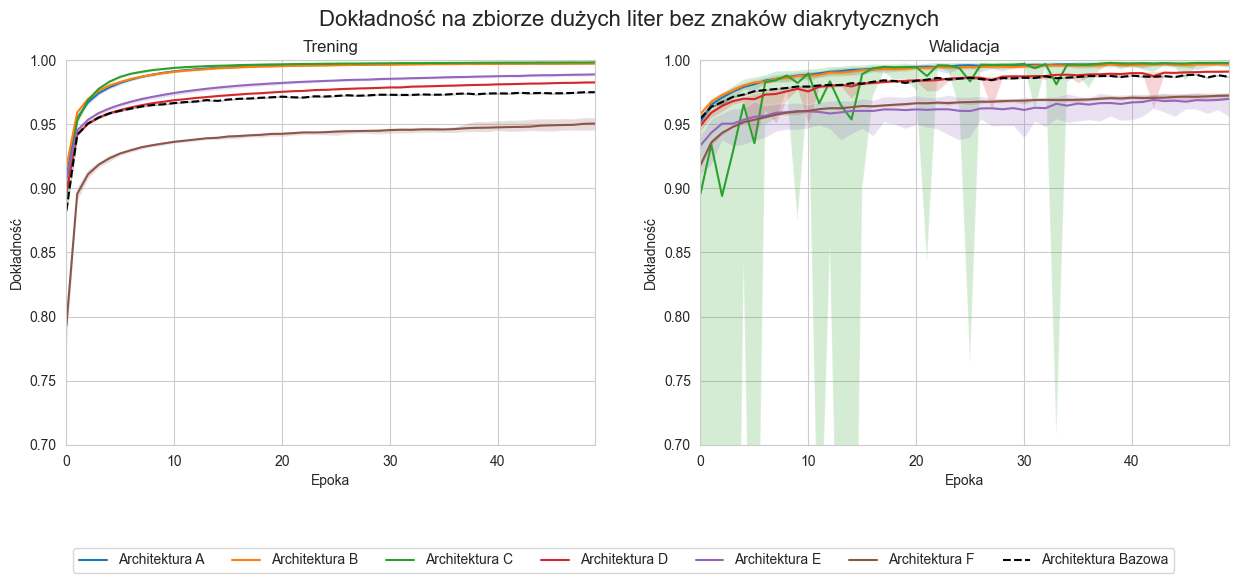

In [3]:
# plot the train and validation results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# plot the train results
for model, label in zip(models, model_labels):
    median_acc = train_data[f"{model} - accuracy"]
    min_acc = train_data[f"{model} - min"]
    max_acc = train_data[f"{model} - max"]

    if label == "Architektura Bazowa":
        ax[0].plot(median_acc, label=label, linestyle="--", color="black")
        ax[0].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2, color="black")
        continue

    ax[0].plot(median_acc, label=label)
    ax[0].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2)

ax[0].set_title("Trening")
ax[0].set_xlabel("Epoka")
ax[0].set_ylabel("Dokładność")

# plot the validation results
for model, label in zip(models, model_labels):
    median_acc = val_data[f"{model} - accuracy"]
    min_acc = val_data[f"{model} - min"]
    max_acc = val_data[f"{model} - max"]

    if label == "Architektura Bazowa":
        ax[1].plot(median_acc, label=label, linestyle="--", color="black")
        ax[1].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2, color="black")
        continue

    ax[1].plot(median_acc, label=label)
    ax[1].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2)

ax[1].set_title("Walidacja")
ax[1].set_xlabel("Epoka")
ax[1].set_ylabel("Dokładność")

# set y axis to 0.7-1.0
ax[0].set_ylim(0.7, 1.0)
ax[1].set_ylim(0.7, 1.0)

# set x axis to 0-50
ax[0].set_xlim(0, 49)
ax[1].set_xlim(0, 49)

# display legend under the plot
ax[1].legend(loc='center left', fancybox=True, ncol=len(model_labels), bbox_to_anchor=(-1.2, -0.3))

fig.suptitle("Dokładność na zbiorze dużych liter bez znaków diakrytycznych", fontsize=16)

In [4]:
model_flops = pd.read_csv(data_dir / "model_flops.csv")
num_parameters = pd.read_csv(data_dir / "num_parameters.csv")
compressed_disk_size = pd.read_csv(data_dir / "compressed_disk_size.csv")

for data in [model_flops, num_parameters, compressed_disk_size]:
    data.columns = [ c.replace("Name: ", "") for c in data.columns ]
    # remove Step column
    #data = data.drop(columns=["Step"])
# remove step column
model_flops = model_flops.drop(columns=["Step"])
num_parameters = num_parameters.drop(columns=["Step"])
compressed_disk_size = compressed_disk_size.drop(columns=["Step"])

# remove columns wth "MIN" and "MAX" in the name
model_flops = model_flops[[c for c in model_flops.columns if "MIN" not in c and "MAX" not in c]]
num_parameters = num_parameters[[c for c in num_parameters.columns if "MIN" not in c and "MAX" not in c]]
compressed_disk_size = compressed_disk_size[[c for c in compressed_disk_size.columns if "MIN" not in c and "MAX" not in c]]

# transpose the dataframes
model_flops = model_flops.T
num_parameters = num_parameters.T
compressed_disk_size = compressed_disk_size.T

# split into 
model_flops

summary_df = pd.DataFrame(columns=["model", "gflops", "num_parameters", "compressed_disk_size"])

for model, label in zip(models, model_labels):
    summary_df = summary_df.append({
        "model": label,
        "gflops": model_flops.loc[f"{model} - model_flops"][0],
        "num_parameters": num_parameters.loc[f"{model} - num_parameters"][0],
        "compressed_disk_size": compressed_disk_size.loc[f"{model} - compressed_disk_size"][0]
    }, ignore_index=True)

summary_df

/tmp/ipykernel_47226/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({
/tmp/ipykernel_47226/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({
/tmp/ipykernel_47226/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({
/tmp/ipykernel_47226/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({
/tmp/ipykernel_47226/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum

,model,gflops,num_parameters,compressed_disk_size
0,Architektura A,0.017216,13824419,5.185539e+07
1,Architektura B,0.005699,1765283,6.632588e+06
2,Architektura C,0.021183,6452387,2.394861e+07
3,Architektura D,0.003976,446675,1.671745e+06
4,Architektura E,0.001640,44675,1.698168e+05
5,Architektura F,0.001298,98083,3.686344e+05
6,Architektura Bazowa,0.014294,483843,1.816564e+06


In [5]:
summary_df["milions of flops"] = summary_df["gflops"].map(lambda x: x * 1000)
summary_df["milions of parameters"] = summary_df["num_parameters"].map(lambda x: x / 1000)
summary_df["compressed disk size (MB)"] = summary_df["compressed_disk_size"].map(lambda x: x / 1000000)

summary_df

,model,gflops,num_parameters,compressed_disk_size,milions of flops,milions of parameters,compressed disk size (MB)
0,Architektura A,0.017216,13824419,5.185539e+07,17.215817,13824.419,51.855394
1,Architektura B,0.005699,1765283,6.632588e+06,5.699049,1765.283,6.632588
2,Architektura C,0.021183,6452387,2.394861e+07,21.182737,6452.387,23.948609
3,Architektura D,0.003976,446675,1.671745e+06,3.976434,446.675,1.671745
4,Architektura E,0.001640,44675,1.698168e+05,1.639761,44.675,0.169817
5,Architektura F,0.001298,98083,3.686344e+05,1.298425,98.083,0.368634
6,Architektura Bazowa,0.014294,483843,1.816564e+06,14.294441,483.843,1.816564


In [6]:
final_summary = summary_df[["model", "milions of flops", "milions of parameters", "compressed disk size (MB)"]]

# sort like this: Baseline, A, B, C, D, E, F

final_summary = final_summary.sort_values(by=["model"], key=lambda x: x.map({
    "Architektura Bazowa": 0,
    "Architektura A": 1,
    "Architektura B": 2,
    "Architektura C": 3,
    "Architektura D": 4,
    "Architektura E": 5,
    "Architektura F": 6
}))

final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Architektura Bazowa,14.294441,483.843,1.816564
0,Architektura A,17.215817,13824.419,51.855394
1,Architektura B,5.699049,1765.283,6.632588
2,Architektura C,21.182737,6452.387,23.948609
3,Architektura D,3.976434,446.675,1.671745
4,Architektura E,1.639761,44.675,0.169817
5,Architektura F,1.298425,98.083,0.368634


# Other charts

In [7]:
results_all = pd.read_excel(data_dir.parent / "Praca magisterska - wyniki.xlsx", sheet_name="Małe litery bez diakrytycznych")

results_all.columns = [
    "Architektura Bazowa",
    "Architektura A",
    "Architektura B",
    "Architektura C",
    "Architektura D",
    "Architektura E",
    "Architektura F",
]

results_all

,Architektura Bazowa,Architektura A,Architektura B,Architektura C,Architektura D,Architektura E,Architektura F
0,0.9859,0.9951,0.9948,0.9972,0.9789,0.9361,0.9400
1,0.9851,0.9950,0.9947,0.9971,0.9788,0.9350,0.9390
2,0.9853,0.9943,0.9938,0.9968,0.9786,0.9326,0.9389
3,0.9847,0.9943,0.9948,0.9967,0.9784,0.9318,0.9385
4,0.9828,0.9925,0.9947,0.9966,0.9783,0.9316,0.9385
5,0.9835,0.9908,0.9938,0.9966,0.9782,0.9303,0.9383
6,0.9828,0.9967,0.9937,0.9964,0.9781,0.9303,0.9380
7,0.9827,0.9965,0.9933,0.9961,0.9781,0.9258,0.8989
8,0.9835,0.9961,0.9932,0.9959,0.9780,0.9255,0.9187
9,0.9825,0.9960,0.9923,0.9953,0.9779,0.9239,0.9469


In [8]:
formatted_final_summary = final_summary.copy()

formatted_final_summary["milions of flops"] = formatted_final_summary["milions of flops"].map(lambda x: f"{x:.2f}")
formatted_final_summary["milions of parameters"] = formatted_final_summary["milions of parameters"].map(lambda x: f"{x:.2f}")
formatted_final_summary["compressed disk size (MB)"] = formatted_final_summary["compressed disk size (MB)"].map(lambda x: f"{x:.2f}")
formatted_final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Architektura Bazowa,14.29,483.84,1.82
0,Architektura A,17.22,13824.42,51.86
1,Architektura B,5.70,1765.28,6.63
2,Architektura C,21.18,6452.39,23.95
3,Architektura D,3.98,446.68,1.67
4,Architektura E,1.64,44.67,0.17
5,Architektura F,1.30,98.08,0.37


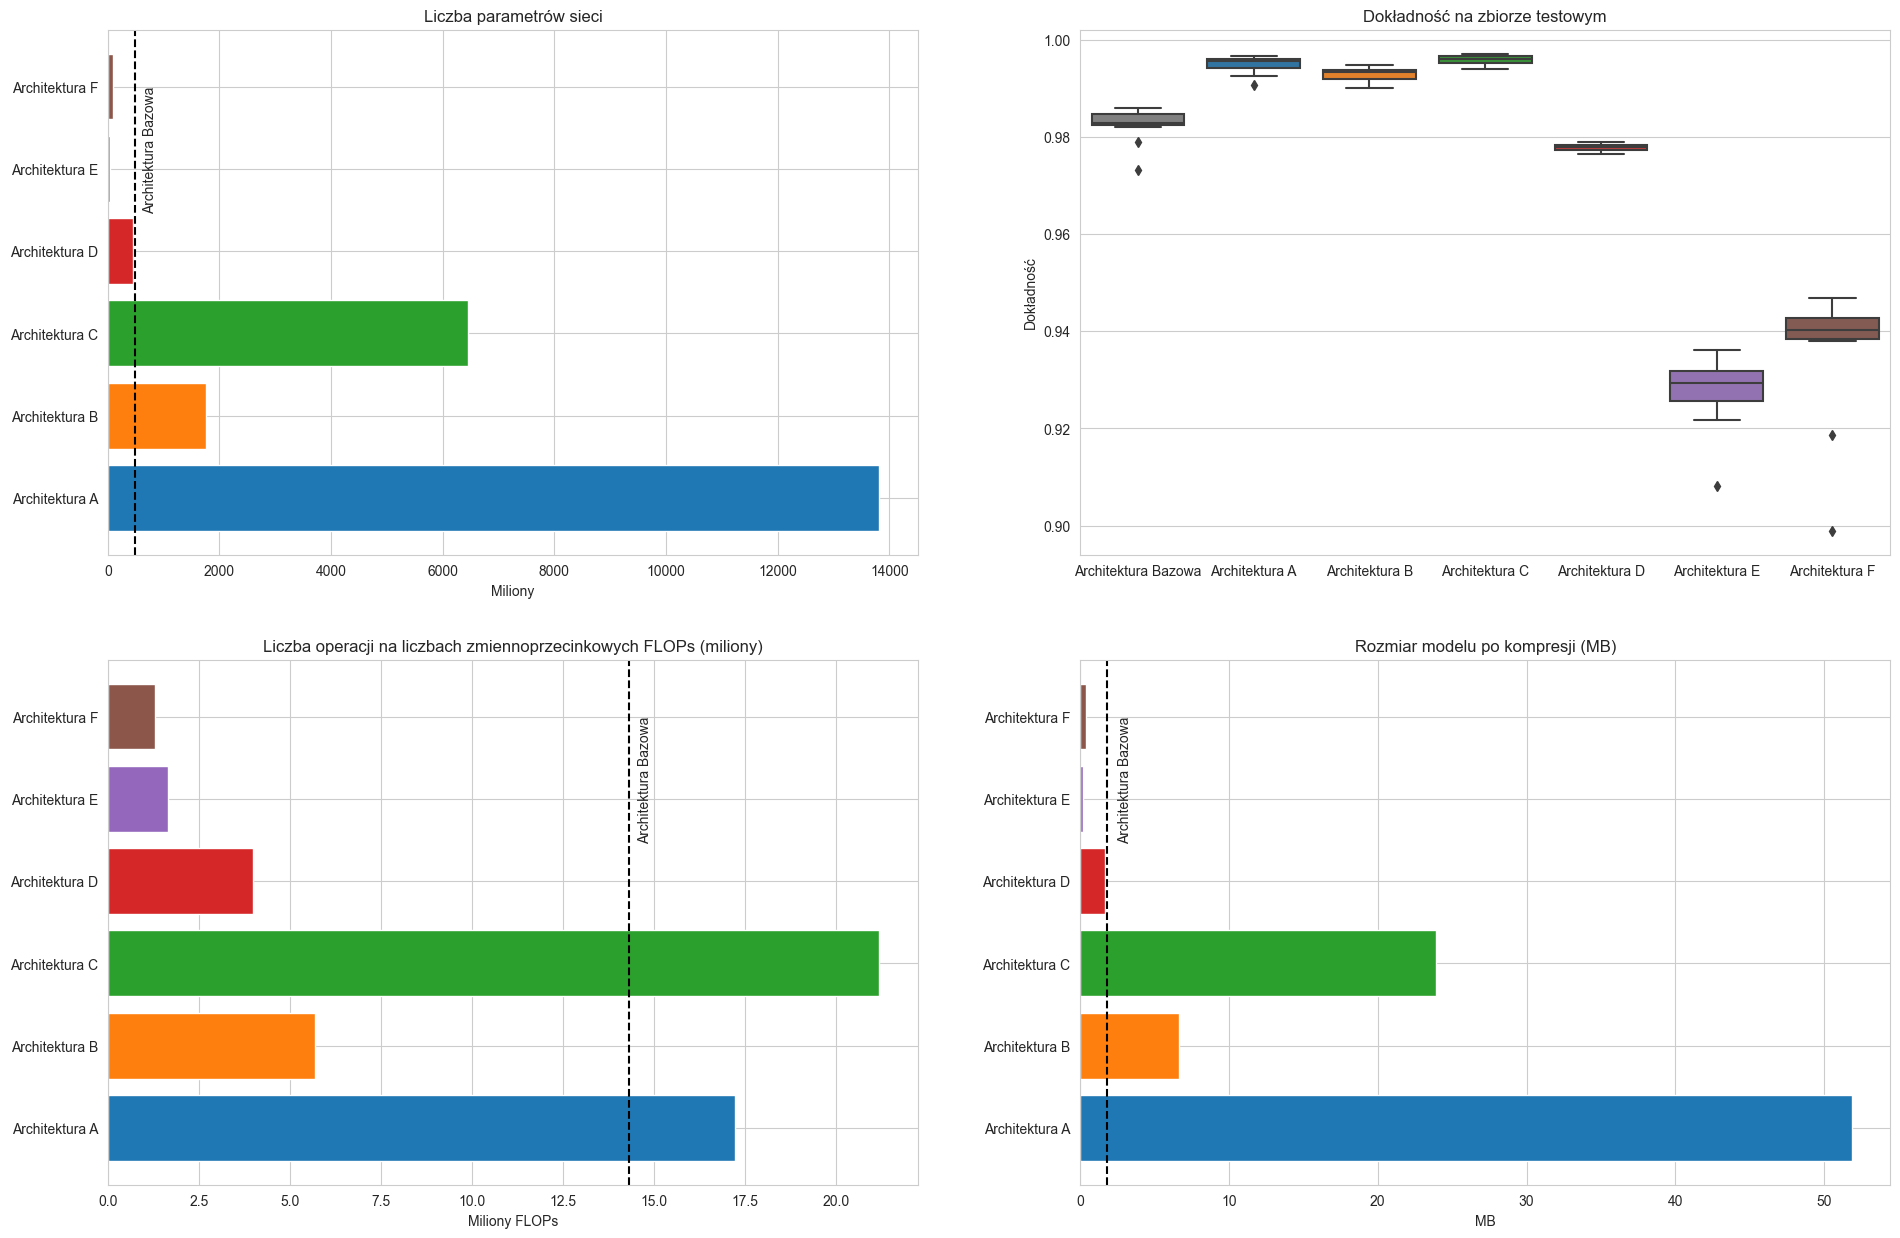

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(23, 15))

axes = axes.flatten()

models_cmap = plt.get_cmap("tab10")
models_cmap_list = [models_cmap(i) for i in range(len(model_labels))] 
models_cmap_list = models_cmap_list[:-1]

# get Baseline values
baseline_values = final_summary[final_summary["model"] == "Architektura Bazowa"].copy()

# remove Baseline from the dataframe
final_summary_no_baseline = final_summary[final_summary["model"] != "Architektura Bazowa"]

# display number of parameters
ax = axes[0]
#final_summary = final_summary.sort_values(by="thousands of parameters", ascending=False)
ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["milions of parameters"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["milions of parameters"].values, color="black", linestyle="--")
# annotate with a text that says "Architektura Bazowa" on the right side of the plot. Draw it sideways
ax.annotate("Architektura Bazowa", xy=(baseline_values["milions of parameters"].values, 0), xytext=(baseline_values["milions of parameters"].values + 150, 3.5), rotation=90)

ax.set_title("Liczba parametrów sieci")
ax.set_xlabel("Miliony")

# display test accuracy as box plots
ax = axes[1]
#ax.boxplot(results_all.values)
# copy models_cmap_list and add gray color to the beginning
boxplot_cmap = models_cmap_list.copy()
boxplot_cmap.insert(0, "gray")
sns.boxplot(data=results_all, ax=ax, palette=boxplot_cmap)
ax.set_xticklabels(results_all.columns)
ax.set_title("Dokładność na zbiorze testowym")
ax.set_ylabel("Dokładność")

# display flops (milions)
ax = axes[2]
#final_summary = final_summary.sort_values(by="milions of flops", ascending=False)
ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["milions of flops"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["milions of flops"].values, color="black", linestyle="--")
# annotate with a text that says "Architektura Bazowa" on the right side of the plot. Draw it sideways
ax.annotate("Architektura Bazowa", xy=(baseline_values["milions of flops"].values, 0), xytext=(baseline_values["milions of flops"].values + 0.25, 3.5), rotation=90)
ax.set_title("Liczba operacji na liczbach zmiennoprzecinkowych FLOPs (miliony)")
ax.set_xlabel("Miliony FLOPs")

# display compressed disk size
ax = axes[3]
ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["compressed disk size (MB)"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["compressed disk size (MB)"].values, color="black", linestyle="--")
# annotate with a text that says "Architektura Bazowa" on the right side of the plot. Draw it sideways
ax.annotate("Architektura Bazowa", xy=(baseline_values["compressed disk size (MB)"].values, 0), xytext=(baseline_values["compressed disk size (MB)"].values + 0.75, 3.5), rotation=90)
ax.set_title("Rozmiar modelu po kompresji (MB)")
ax.set_xlabel("MB")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


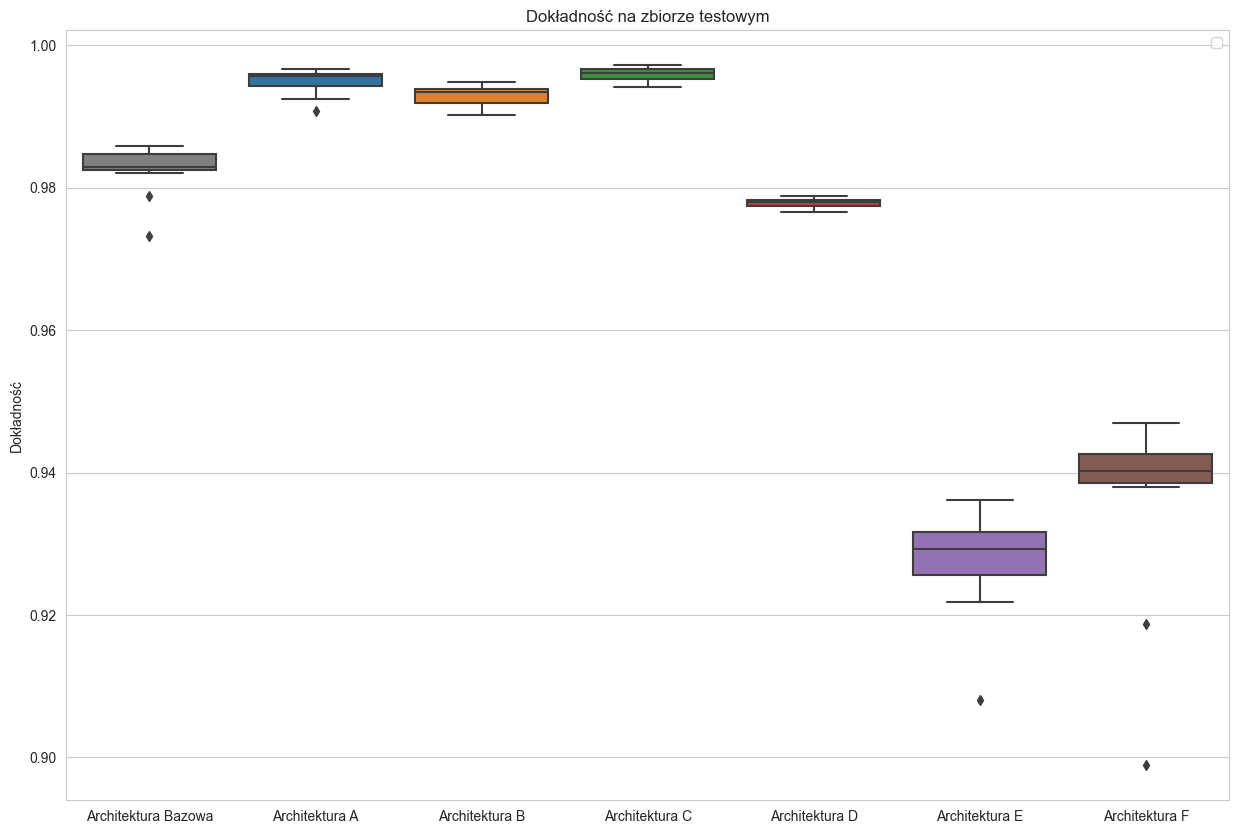

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#ax.boxplot(results_all.values)
# copy models_cmap_list and add gray color to the beginning
boxplot_cmap = models_cmap_list.copy()
boxplot_cmap.insert(0, "gray")
sns.boxplot(data=results_all, ax=ax, palette=boxplot_cmap)
ax.set_xticklabels(results_all.columns)
ax.set_title("Dokładność na zbiorze testowym")
ax.set_ylabel("Dokładność")

# show legend
ax.legend()
plt.show()

In [10]:
final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Architektura Bazowa,14.294441,483.843,1.816564
0,Architektura A,17.215817,13824.419,51.855394
1,Architektura B,5.699049,1765.283,6.632588
2,Architektura C,21.182737,6452.387,23.948609
3,Architektura D,3.976434,446.675,1.671745
4,Architektura E,1.639761,44.675,0.169817
5,Architektura F,1.298425,98.083,0.368634


/tmp/ipykernel_47226/1263803957.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_param_acc = num_param_acc.append(model_num_param_acc)
/tmp/ipykernel_47226/1263803957.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_param_acc = num_param_acc.append(model_num_param_acc)
/tmp/ipykernel_47226/1263803957.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_param_acc = num_param_acc.append(model_num_param_acc)
/tmp/ipykernel_47226/1263803957.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_param_acc = num_param_acc.append(model_num_param_acc)
/tmp/ipykernel_47226/1263803957.py:18: FutureWarning: The frame.append m

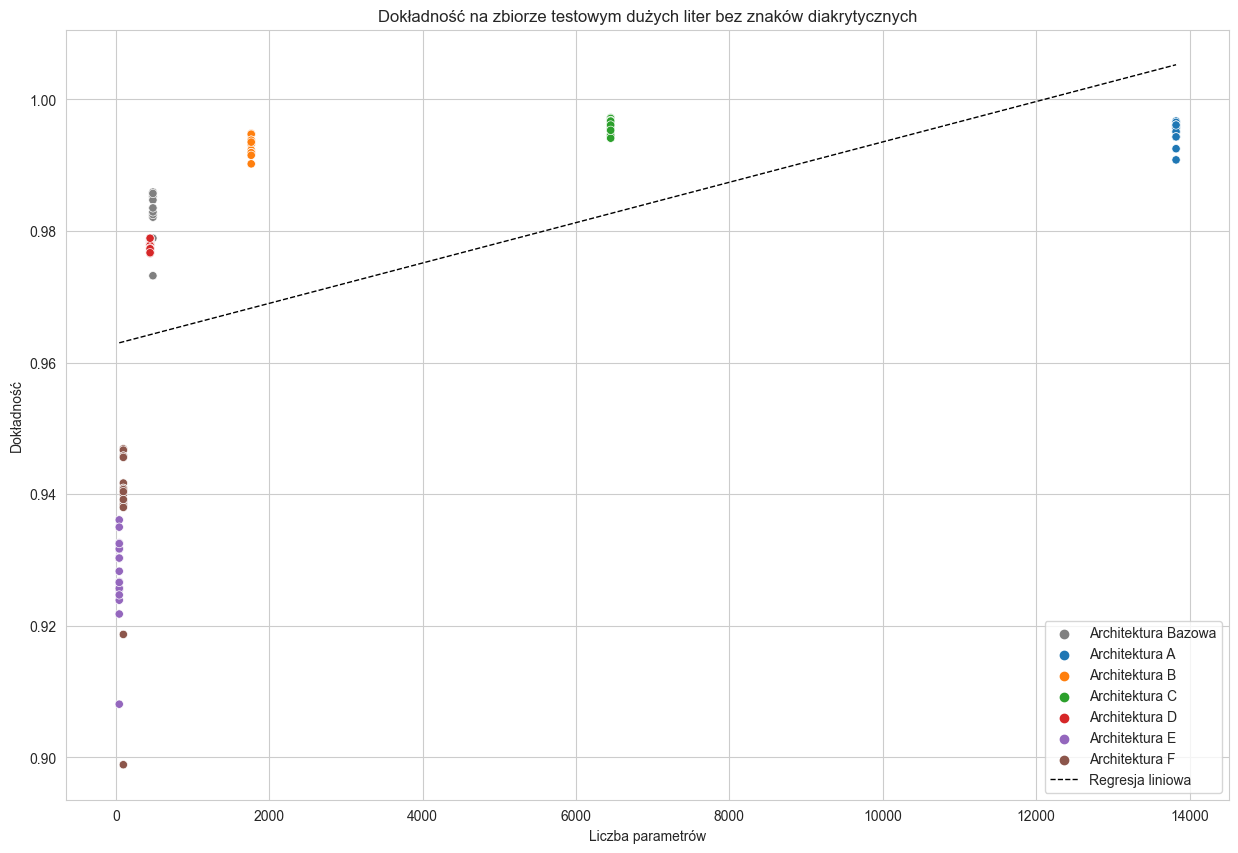

In [11]:
# based on results_all and final_summary, plot scatterplot accuracy vs. number of parameters where x axis is number of parameters and y axis is accuracy and each dot is an observation from results_all
# and each dot is colored based on the model it belongs to

# create a new dataframe with columns: model, accuracy, num_parameters
num_param_acc = pd.DataFrame(columns=["model", "accuracy", "num_parameters"])

for model in results_all.columns:
    # get accuracy values for the model
    acc = results_all[model]
    # get number of parameters for the model
    num_params = final_summary[final_summary["model"] == model]["milions of parameters"].values[0]
    # create a new dataframe with columns: model, accuracy, num_parameters
    model_num_param_acc = pd.DataFrame(columns=["model", "accuracy", "num_parameters"])
    model_num_param_acc["model"] = [model] * len(acc)
    model_num_param_acc["accuracy"] = acc
    model_num_param_acc["num_parameters"] = num_params
    # append the dataframe to the main dataframe
    num_param_acc = num_param_acc.append(model_num_param_acc)

# plot the scatterplot

fig, ax = plt.subplots(figsize=(15, 10))

# plot the scatterplot
sns.scatterplot(data=num_param_acc, x="num_parameters", y="accuracy", hue="model", ax=ax, palette=boxplot_cmap)

# show legend

# set title
ax.set_title("Dokładność na zbiorze testowym dużych liter bez znaków diakrytycznych")



# plot reggression line as thin black dashed line with label "Regresja liniowa"
sns.regplot(data=num_param_acc, x="num_parameters", y="accuracy", ax=ax, color="black", scatter=False, line_kws={"linestyle":"--", "linewidth":1}, ci=None, label="Regresja liniowa")
ax.set_xlabel("Liczba parametrów")
ax.set_ylabel("Dokładność")
ax.legend(loc="lower right")

plt.show()